# Binary Image Classfication Dog vs Cats
### TODOS:
####   Create a new archtikture 
####   Directorys for Pictures 
####   Image Generator for robust model
####   Complie 
####   fit model
####   accuracy  
####   save model

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory


2024-12-25 21:13:56.551982: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-25 21:13:56.605446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735157636.637719    6466 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735157636.649920    6466 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 21:13:56.722092: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Anzeigen der verfügbaren Geräte
devices = tf.config.list_physical_devices()
for device in devices:
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


##### Set Dircetory for Images
----

In [ ]:
import os
import shutil
import pathlib

# Ursprünglicher Datenordner
original_dir = pathlib.Path("Data")  # Oberordner der Kategorien
new_base_dir = pathlib.Path("cats_vs_dogs_small")  # Zielbasisordner

def make_subset(subset_name, start_index, end_index):
    # Kategorien (Ordner: Cat und Dog)
    for category in ("Cat", "Dog"):
        # Neues Zielverzeichnis erstellen
        dir = new_base_dir / subset_name / category.lower()  # Kategorienamen in Kleinbuchstaben
        os.makedirs(dir, exist_ok=True)  # Ordner erstellen, falls nicht vorhanden

        # Bilder dieser Kategorie auswählen
        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            # Quell- und Zielpfade definieren
            src = original_dir / category / fname
            dst = dir / fname

            # Datei kopieren, wenn sie existiert
            if src.exists():
                shutil.copyfile(src, dst)

# Teilmengen erstellen
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


In [3]:
train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/train",
    image_size=(180, 180),
    batch_size=32)
    
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_small/test",
    image_size=(180, 180),
    batch_size=32)

Found 1999 files belonging to 2 classes.


I0000 00:00:1735157644.538541    6466 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13831 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


Found 1000 files belonging to 2 classes.
Found 1987 files belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [5]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

2024-12-25 21:14:11.014280: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


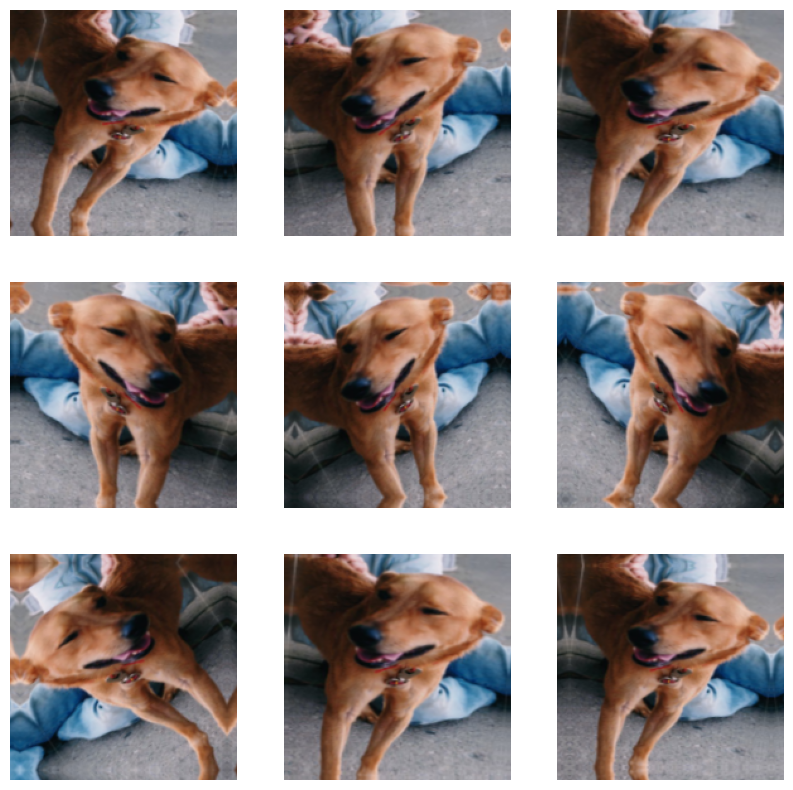

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1): #welches bild
    for i in range(9): # bilder anzahl
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1) # wie viele plots
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [ ]:
# callbacks = [
# keras.callbacks.ModelCheckpoint(
# filepath="GPU_convnet_from_scratch_with_augmentation.keras",
# save_best_only=True,
# monitor="val_loss")
# ]

In [10]:
tf.config.experimental.set_visible_devices([], 'GPU')

RuntimeError: Visible devices cannot be modified after being initialized

In [11]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    #callbacks=callbacks
    )


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6238 - loss: 0.6488

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6240 - loss: 0.6487 - val_accuracy: 0.6320 - val_loss: 0.6337
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6450 - loss: 0.6129 - val_accuracy: 0.6810 - val_loss: 0.5808
Epoch 3/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6767 - loss: 0.6088

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6766 - loss: 0.6087 - val_accuracy: 0.6860 - val_loss: 0.5982
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6759 - loss: 0.6107 - val_accuracy: 0.6380 - val_loss: 0.7511
Epoch 5/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6875 - loss: 0.5494

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6609 - loss: 0.6094 - val_accuracy: 0.6500 - val_loss: 0.6267
Epoch 6/50
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7116 - loss: 0.6194

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7055 - loss: 0.5935

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7057 - loss: 0.5930 - val_accuracy: 0.7010 - val_loss: 0.5797
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7119 - loss: 0.5737 - val_accuracy: 0.7140 - val_loss: 0.5490
Epoch 8/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7141 - loss: 0.5442 - val_accuracy: 0.7500 - val_loss: 0.5315
Epoch 9/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7146 - loss: 0.5698 - val_accuracy: 0.6980 - val_loss: 0.6472
Epoch 10/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6875 - loss: 0.5917

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7286 - loss: 0.5337 - val_accuracy: 0.7280 - val_loss: 0.5531
Epoch 11/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7188 - loss: 0.4894

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7272 - loss: 0.5319 - val_accuracy: 0.6530 - val_loss: 0.7647
Epoch 12/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6250 - loss: 0.5180

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7537 - loss: 0.5063 - val_accuracy: 0.7470 - val_loss: 0.5086
Epoch 13/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8750 - loss: 0.3374

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7637 - loss: 0.4910

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7638 - loss: 0.4911 - val_accuracy: 0.7180 - val_loss: 0.6246
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7674 - loss: 0.4884 - val_accuracy: 0.7820 - val_loss: 0.4752
Epoch 15/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8438 - loss: 0.4246

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7874 - loss: 0.4788

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7874 - loss: 0.4787 - val_accuracy: 0.7270 - val_loss: 0.5686
Epoch 16/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7835 - loss: 0.4717 - val_accuracy: 0.7720 - val_loss: 0.4840
Epoch 17/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8438 - loss: 0.4245

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7724 - loss: 0.4708 - val_accuracy: 0.7550 - val_loss: 0.5219
Epoch 18/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7810 - loss: 0.4521 - val_accuracy: 0.7690 - val_loss: 0.5250
Epoch 19/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7749 - loss: 0.4773 - val_accuracy: 0.7920 - val_loss: 0.4542
Epoch 20/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7790 - loss: 0.4571

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7799 - loss: 0.4557 - val_accuracy: 0.8160 - val_loss: 0.4340
Epoch 21/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8152 - loss: 0.4218 - val_accuracy: 0.6970 - val_loss: 0.6962
Epoch 22/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7967 - loss: 0.4348 - val_accuracy: 0.7460 - val_loss: 0.5793
Epoch 23/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8256 - loss: 0.3932 - val_accuracy: 0.8050 - val_loss: 0.4709
Epoch 24/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.8750 - loss: 0.3031

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8248 - loss: 0.4132 - val_accuracy: 0.7830 - val_loss: 0.4978
Epoch 25/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8184 - loss: 0.4010

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8189 - loss: 0.4001 - val_accuracy: 0.8000 - val_loss: 0.5085
Epoch 26/50
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8043 - loss: 0.4547

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8057 - loss: 0.4514 - val_accuracy: 0.7920 - val_loss: 0.5286
Epoch 27/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8384 - loss: 0.3695

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8384 - loss: 0.3694 - val_accuracy: 0.8260 - val_loss: 0.4475
Epoch 28/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8530 - loss: 0.3662 - val_accuracy: 0.7300 - val_loss: 0.6247
Epoch 29/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7500 - loss: 0.5546

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8328 - loss: 0.3889 - val_accuracy: 0.7520 - val_loss: 0.5999
Epoch 30/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6562 - loss: 0.6033

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8443 - loss: 0.3648 - val_accuracy: 0.8120 - val_loss: 0.5313
Epoch 31/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8400 - loss: 0.3547 - val_accuracy: 0.8140 - val_loss: 0.4546


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


Epoch 32/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8635 - loss: 0.3348 - val_accuracy: 0.8150 - val_loss: 0.5250
Epoch 33/50
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7799 - loss: 0.4623

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8591 - loss: 0.3313

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8595 - loss: 0.3303 - val_accuracy: 0.8400 - val_loss: 0.4037
Epoch 34/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8491 - loss: 0.3621 - val_accuracy: 0.7670 - val_loss: 0.7077
Epoch 35/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8699 - loss: 0.3222 - val_accuracy: 0.8220 - val_loss: 0.4325
Epoch 36/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8590 - loss: 0.3335

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8592 - loss: 0.3330 - val_accuracy: 0.8140 - val_loss: 0.4824
Epoch 37/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8403 - loss: 0.3490

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8407 - loss: 0.3483 - val_accuracy: 0.8180 - val_loss: 0.4932
Epoch 38/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8711 - loss: 0.3031 - val_accuracy: 0.7990 - val_loss: 0.5274
Epoch 39/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8781 - loss: 0.3007 - val_accuracy: 0.8110 - val_loss: 0.5132
Epoch 40/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8734 - loss: 0.2801 - val_accuracy: 0.8210 - val_loss: 0.5191
Epoch 41/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.7812 - loss: 0.6489

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8723 - loss: 0.3111 - val_accuracy: 0.8400 - val_loss: 0.4022
Epoch 42/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8795 - loss: 0.2912 - val_accuracy: 0.7970 - val_loss: 0.5691
Epoch 43/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8822 - loss: 0.2819

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8825 - loss: 0.2815 - val_accuracy: 0.8100 - val_loss: 0.5621
Epoch 44/50
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8729 - loss: 0.2955

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8733 - loss: 0.2946 - val_accuracy: 0.8270 - val_loss: 0.4962
Epoch 45/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8997 - loss: 0.2630 - val_accuracy: 0.8480 - val_loss: 0.4444
Epoch 46/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8750 - loss: 0.1773

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8860 - loss: 0.2519 - val_accuracy: 0.7810 - val_loss: 0.5719
Epoch 47/50
 4/63 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8105 - loss: 0.3553

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8880 - loss: 0.2433 - val_accuracy: 0.8320 - val_loss: 0.4498
Epoch 48/50


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8906 - loss: 0.2684 - val_accuracy: 0.8230 - val_loss: 0.5781
Epoch 49/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8438 - loss: 0.2823

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8870 - loss: 0.2560 - val_accuracy: 0.7980 - val_loss: 0.7327
Epoch 50/50
 1/63 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7500 - loss: 0.6624

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8875 - loss: 0.2907

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8879 - loss: 0.2895 - val_accuracy: 0.8140 - val_loss: 0.5340


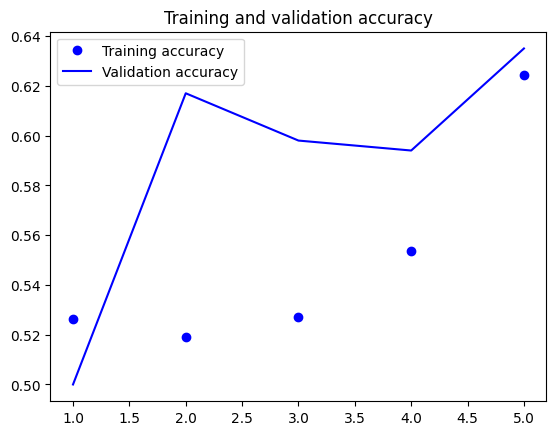

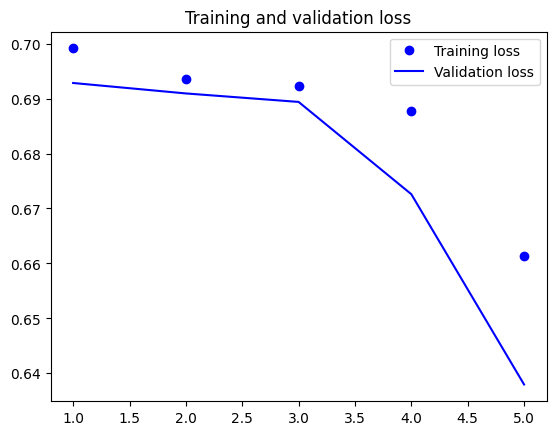

In [7]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
"model/GPU_convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

Final Results is a accaruy in the test data of 0.838

In [1]:
import tensorflow as tf

# Modell laden
model_path = r"model/GPU_convnet_from_scratch_with_augmentation.keras"
convnet_from_scratch = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
convnet_from_scratch.summary()

2024-12-12 10:37:44.357437: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-12 10:37:44.364461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733996264.372984    4496 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733996264.375466    4496 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 10:37:44.384647: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

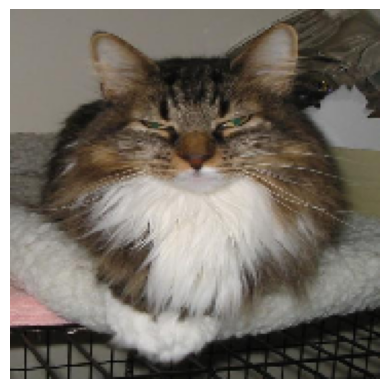

In [2]:
# Model nutzen
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = r"cats_vs_dogs_small/test/cat/1504.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [3]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


(1, 180, 180, 3)


In [4]:
# Vorhersage mit dem geladenen Modell
prediction = convnet_from_scratch.predict(img_array)

# Vorhersage auswerten
# Da es eine binäre Klassifikation (Hund vs. Katze) ist:
if prediction[0] > 0.5:
    print("Das Bild zeigt einen Hund.")
else:
    print("Das Bild zeigt eine Katze.")

# Ausgabe der Vorhersagewahrscheinlichkeit
print("Vorhersagewahrscheinlichkeit für Hund:", prediction)


I0000 00:00:1733996272.795653   17767 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Das Bild zeigt eine Katze.
Vorhersagewahrscheinlichkeit für Hund: [[0.04659241]]


more than two class image classification

In [43]:
import os
def rename_pictures(image_path = str):
    for i, filename in enumerate(os.listdir(image_path)):
        os.rename(image_path + filename, image_path + str(i) + ".jpg")

rename_pictures("Data/Horses/")

In [44]:
import os
import shutil
import pathlib

# Ursprünglicher Datenordner
original_dir = pathlib.Path("Data")  # Oberordner der Kategorien
new_base_dir = pathlib.Path("cats_vs_dogs_vs_horses")  # Zielbasisordner

def make_subset(subset_name, start_index, end_index):
    # Kategorien (Ordner: Cat, Dog, Horses)
    for category in ("Cat", "Dog", "Horses"):
        # Neues Zielverzeichnis erstellen
        dir = new_base_dir / subset_name / category.lower()  # Kategorienamen in Kleinbuchstaben
        os.makedirs(dir, exist_ok=True)  # Ordner erstellen, falls nicht vorhanden

        # Bilder dieser Kategorie auswählen
        for i in range(start_index, end_index):
            # Versuche beide möglichen Dateiendungen (.jpg und .png)
            for ext in (".jpg", ".png"):
                fname = f"{i}{ext}"
                src = original_dir / category / fname
                dst = dir / fname

                # Datei kopieren, wenn sie existiert
                if src.exists():
                    shutil.copyfile(src, dst)
                    break  # Falls eine passende Datei gefunden wurde, zur nächsten Zahl wechseln

# Teilmengen erstellen
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=1862)


In [45]:
train_dataset = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/train",
    image_size=(180, 180),
    batch_size=32)
    
validation_dataset = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/validation",
    image_size=(180, 180),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "cats_vs_dogs_vs_horses/test",
    image_size=(180, 180),
    batch_size=32)


Found 2999 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.
Found 1086 files belonging to 3 classes.


In [46]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [47]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [48]:
# Input of the model

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(3, activation="softmax")(x)
multiclass_model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
multiclass_model.summary()

In [ ]:
multiclass_model.compile(optimizer="adam", 
                         loss="sparse_categorical_crossentropy", 
                         metrics=["accuracy"])

callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="model/GPU_multiclass_model.keras",
save_best_only=True,
monitor="val_loss")
]


In [ ]:
with tf.device('/GPU:0'):
    history = multiclass_model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

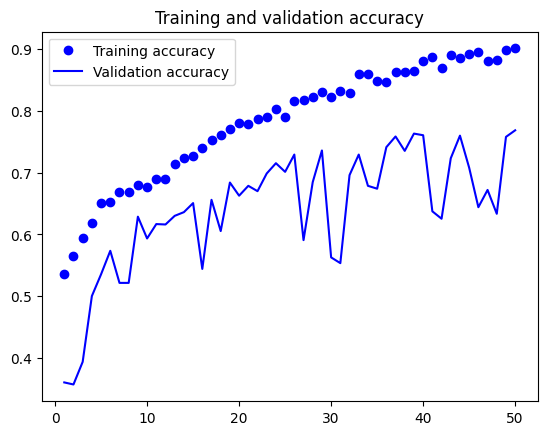

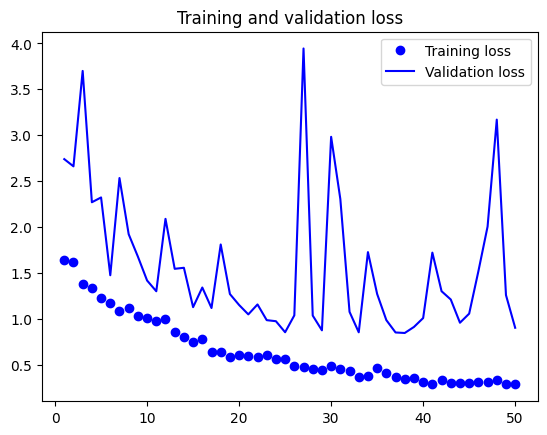

In [52]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

# Plotting
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [53]:
test_GPU_multiclass_model = keras.models.load_model(
"model/GPU_multiclass_model.keras")
test_loss, test_acc = test_GPU_multiclass_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

30/34 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7572 - loss: 0.8810

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7553 - loss: 0.8879
Test accuracy: 0.743


In [5]:
import tensorflow as tf

# Modell laden
model_path = "model/GPU_multiclass_model.keras"
GPU_multiclass_model = tf.keras.models.load_model(model_path)

# Modell Zusammenfassung anzeigen
#GPU_multiclass_model.summary()

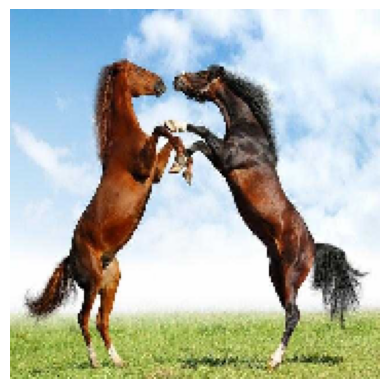

In [15]:
# Model nutzen
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Bild laden
image_path = "cats_vs_dogs_vs_horses/test/horses/1602.jpg"

# Bild auf die gewünschte Eingabegröße skalieren unsere Modell nimmt 180 x 180 x3
img = image.load_img(image_path, target_size=(180, 180))

# Bild anzeigen
plt.imshow(img)
plt.axis("off")
plt.show()


In [16]:
# Das Bild in ein NumPy-Array umwandeln
img_array = image.img_to_array(img)
# Das Bild auf die Batch-Dimension erweitern (Modell erwartet eine Batch von Bildern)
img_array = np.expand_dims(img_array, axis=0)
print(img_array.shape)


(1, 180, 180, 3)


In [17]:
import numpy as np

# Vorhersage mit dem geladenen Modell
prediction_GPU_multiclass_model = GPU_multiclass_model.predict(img_array)

# Klasse mit der höchsten Wahrscheinlichkeit auswählen
predicted_class = np.argmax(prediction_GPU_multiclass_model[0])

# Vorhersage auswerten
class_labels = ["Katze", "Hund", "Pferd"]  # Labels entsprechend den Klassen
print(f"Das Bild zeigt ein(e): {class_labels[predicted_class]}")

# Wahrscheinlichkeiten anzeigen
print("Vorhersagewahrscheinlichkeiten:", prediction_GPU_multiclass_model[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Das Bild zeigt ein(e): Pferd
Vorhersagewahrscheinlichkeiten: [8.9430640e-18 4.3003088e-15 1.0000000e+00]


In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
import os

2024-12-25 16:38:12.383920: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-25 16:38:12.391351: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735141092.400147   64178 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735141092.402655   64178 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-25 16:38:12.412366: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:

print(os.getcwd())
validation_dataset = image_dataset_from_directory(
                "Validation/",
                image_size=(180, 180),
                batch_size=32
            )

/home/riccardodandrea/Schreibtisch/Github/SceneDetect
Found 510 files belonging to 1 classes.


I0000 00:00:1735141094.469626   64178 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13803 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [17]:

import os
import shutil
def remove_folders_but_keep_images(main_folder):
    # Durchlaufe alle Unterordner und Dateien im Hauptordner
    for root, dirs, files in os.walk(main_folder, topdown=False):
        for file in files:
            file_path = os.path.join(root, file)
            # Verschiebe die Datei in den Hauptordner
            shutil.move(file_path, main_folder)
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            # Lösche den leeren Unterordner
            os.rmdir(dir_path)

# Hauptordner hier angeben
main_folder = "/home/riccardodandrea/Downloads/archive/imagenet-mini/train"
remove_folders_but_keep_images(main_folder)

In [19]:
import os
import random
import shutil

def select_random_images(source_folder, target_folder, num_images):
    # Erstelle den Zielordner, falls er nicht existiert
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    # Durchlaufe alle Dateien im Quellordner und filtere nur die Bilddateien
    all_files = []
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Bildformate
                all_files.append(os.path.join(root, file))
    
    # Wähle zufällig 'num_images' Bilder aus
    selected_files = random.sample(all_files, num_images)
    
    # Kopiere die ausgewählten Bilder in den Zielordner
    for file in selected_files:
        shutil.copy(file, target_folder)
    
    print(f"{num_images} zufällige Bilder wurden in {target_folder} gespeichert.")

# Quellordner und Zielordner festlegen
source_folder = "/home/riccardodandrea/Downloads/archive/imagenet-mini/train"
target_folder = "/home/riccardodandrea/Downloads/archive/imagenet-mini/random_images"
num_images = 500  # Anzahl der zufällig auszuwählenden Bilder

select_random_images(source_folder, target_folder, num_images)


500 zufällige Bilder wurden in /home/riccardodandrea/Downloads/archive/imagenet-mini/random_images gespeichert.


In [20]:
import os

def rename_images_to_numeric(folder_path):
    # Hole alle Dateien im Ordner
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    # Filtere nur Bilddateien
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    
    # Sortiere die Bilddateien (optional, wenn eine feste Reihenfolge gewünscht ist)
    image_files.sort()
    
    # Umbenenne die Bilder numerisch
    for idx, image_file in enumerate(image_files):
        old_path = os.path.join(folder_path, image_file)
        new_name = f"{idx}.jpeg"
        new_path = os.path.join(folder_path, new_name)
        
        # Benenne die Datei um
        os.rename(old_path, new_path)
    
    print(f"Alle {len(image_files)} Bilder wurden numerisch umbenannt und in .jpeg umgewandelt.")

# Verzeichnis angeben
folder_path = "Validation/random_images"
rename_images_to_numeric(folder_path)


Alle 510 Bilder wurden numerisch umbenannt und in .jpeg umgewandelt.
